In [1]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle

%matplotlib inline

In [2]:
folder_Pk = '/global/cscratch1/sd/jialiu/CAMELS/Pk/' ### original, unorganized Pk
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

###### the simulation we operate with
isim = 'IllustrisTNG'

In [3]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

In [18]:
######## parameter file: https://github.com/franciscovillaescusa/CAMELS/blob/master/docs/params/CosmoAstroSeed_Astrid.txt

#### Omega_m sigma_8 A1 A2 A3 A4
sim_name = np.loadtxt(home+'params/CosmoAstroSeed_%s.txt'%(isim), usecols=(0), dtype='U')
sim_params = np.loadtxt(home+'params/CosmoAstroSeed_%s.txt'%(isim), usecols=range(1,7))

#### change all the baryon parameters to log
labels=['Omega_m', 'sigma_8', 'log10(A1)', 'log10(A2)', 'log10(A3)', 'log10(A4)']
sim_params = concatenate([sim_params[:,:2], log10(sim_params[:,2:])],axis=1)

sim_name, sim_params

(array(['LH_0', 'LH_1', 'LH_2', ..., 'CV_24', 'CV_25', 'CV_26'],
       dtype='<U7'),
 array([[ 0.309     ,  0.979     ,  0.49308703,  0.04996963, -0.17489859,
         -0.27423533],
        [ 0.3026    ,  0.9394    ,  0.53402738,  0.59784541,  0.01414657,
          0.06471998],
        [ 0.4282    ,  0.753     , -0.15111534, -0.4268614 ,  0.2929026 ,
         -0.20259395],
        ...,
        [ 0.3       ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.3       ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.3       ,  0.8       ,  0.        ,  0.        ,  0.        ,
          0.        ]]))

In [17]:
idx_LH = where(np.char.find(sim_name, 'LH')!=-1)
idx_1P = where(np.char.find(sim_name, '1P')!=-1)
idx_CV = where(np.char.find(sim_name, 'CV')!=-1)

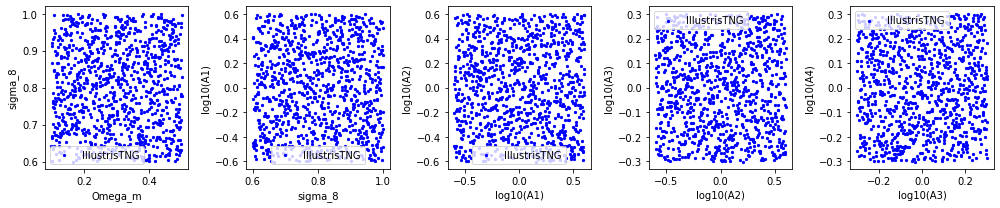

In [20]:
lhc_params = sim_params[idx_LH]
f, ax=subplots(1,5, figsize=(14,3))

for i in range(5):
    ax[i].scatter(lhc_params.T[i], lhc_params.T[i+1], color='b', label=isim,s=5)
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1])   
    ax[i].legend()
plt.tight_layout()
show()

In [28]:
# k=np.loadtxt(home+'CAMELS/Pk/IllustrisTNG/LH_0/Pk_m_z=0.00.txt').T[0]
# np.save(home+'Pk/IllustrisTNG_k_m_z=0.00.npy', k)
k=np.load(home+'Pk/IllustrisTNG_k_m_z=0.00.npy')
# zarr=[0.00, 1.05, 2.00, 0.05, 0.10, 0.15] #
# for ifolder in ['IllustrisTNG',  'IllustrisTNG_DM',  'SIMBA',  'SIMBA_DM']:
#     for iz in zarr:
#         ifn=home+'Pk/%s_Pk_m_z=%.2f.npy'%(ifolder, iz)
#         if os.path.isfile(ifn):
#             print(ifn, 'file already exist, continue')
#             continue
#         print (ifolder, iz)
#         Pk_arr = array([np.loadtxt(folder_Pk+'%s/LH_%i/Pk_m_z=%.2f.txt'%(ifolder, i, iz)) for i in range(1000)])
#         save(ifn, Pk_arr[:,:,1])
#         if sum(Pk_arr[0,:,0]-k):
#             print (ifolder, iz, 'k different')
#             save(home+'Pk/%s_k_m_z=%.2f.npy'%(ifolder, iz), Pk_arr[0,:,0])

In [27]:
k

array([  0.35598565,   0.60316489,   0.85791607,   1.11346431,
         1.37403991,   1.6191547 ,   1.87068667,   2.12329004,
         2.37814498,   2.63048993,   2.87865316,   3.13114437,
         3.38815958,   3.63874185,   3.88831591,   4.13905216,
         4.39030578,   4.64217234,   4.89467867,   5.14726905,
         5.39800321,   5.64779824,   5.9005343 ,   6.1514603 ,
         6.40263018,   6.65596467,   6.90878258,   7.15906085,
         7.40941476,   7.65922715,   7.91155947,   8.16375094,
         8.41575721,   8.66763884,   8.91880112,   9.17048011,
         9.42056603,   9.67164234,   9.92342616,  10.17396903,
        10.42533701,  10.67702948,  10.92969337,  11.18211872,
        11.43346517,  11.68350509,  11.93379938,  12.18553056,
        12.43711651,  12.68867269,  12.94075027,  13.19267287,
        13.44470572,  13.6948015 ,  13.94591277,  14.19764646,
        14.44766774,  14.69906836,  14.95059118,  15.20261613,
        15.45415945,  15.70456073,  15.957058  ,  16.20